# 第三章 神经网络

神经网络由多层构成：输入层、中间层（多干，也称隐藏层）和输出层，依次被称为第0层，第1层，... ，第n层。

书中“b是被称为偏置的参数，用于控制神经元被激活的容易程度；而和是表示各个信号的权重的参数，用于控制各个信号的重要性。"的理解：

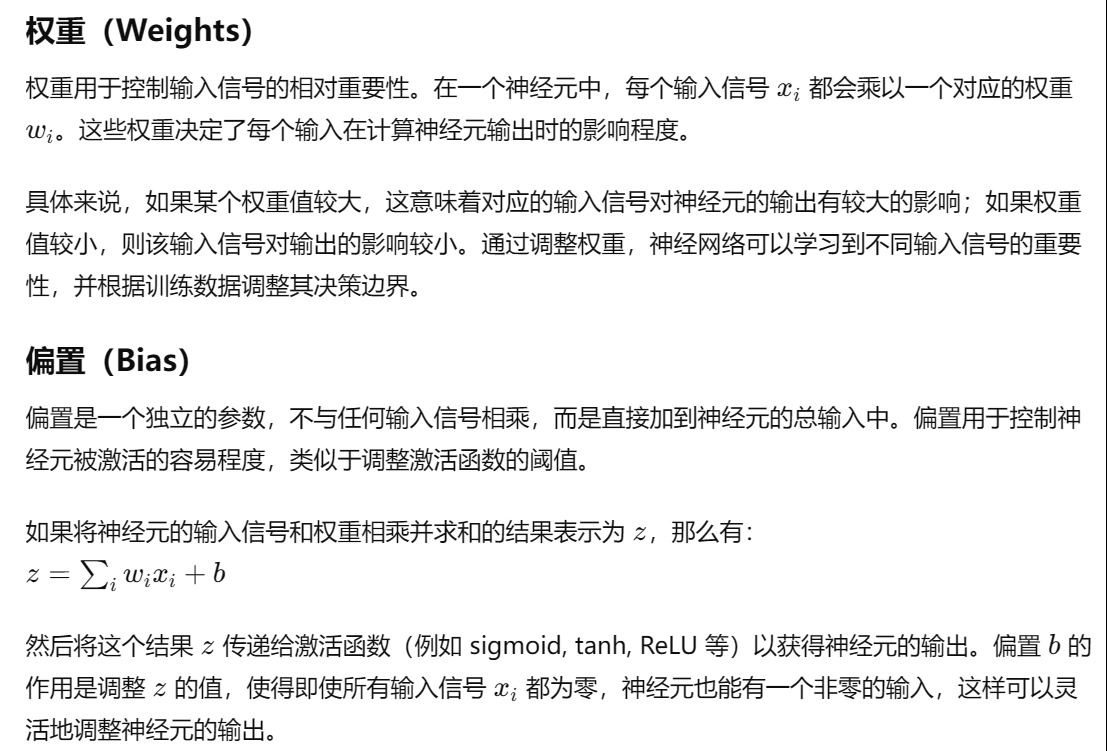

> 如何理解“偏置用于控制神经元被激活的容易程度”？
> 所谓“容易程度”是指当输入信号经过加权和计算后，偏置会影响神经元是否会激活。如果偏置较高，神经元即使在较小的输入信号下也容易被激活；相反，如果偏置较低，神经元就需要更强的输入信号才能被激活。因此，通过调整偏置参数，可以控制神经元对输入信号的敏感度。

> 如何理解“神经元被激活”？ 激活是指在神经网络中，神经元接收到的输入信号经过处理后产生输出的过程。具体过程如下：
- 输入信号：神经元接收来自前一层的输入信号，这些信号会被相应的权重加权。
- 加权和：神经元会计算所有输入信号和对应权重的加权和，并加上偏置b，形成一个综合值。
- 激活函数：这个综合值会传递给一个激活函数。激活函数决定了神经元是否被激活。若综合值超过某个阈值，激活函数会输出一个积极的信号，表示该神经元被激活；否则，输出可能为零或小于该阈值的值。
- 输出信号：被激活的神经元会将其输出信号传递给下一层的神经元或最终的输出层。
> 因此，神经元的“激活”是一个决定其输出的关键环节，直接影响整个神经网络的学习和预测能力。

> 未被激活的神经元的输出通常会被抛弃，不会作为下一层的输入。在神经网络的运行过程中，只有那些经过激活函数处理后，输出大于零（或达到激活阈值）的神经元才能将其信号传递给下一层。这样做的好处是能够简化后续层的计算，同时也增加了网络的非线性特性，有助于学习复杂的模式和特征。具体来说，许多激活函数（如ReLu）会将负值输出为零，这意味着任何未激活的神经元在下一层的输入中不会起作用。

## 3.2 激活函数

每一层的线性变换结果作为这一层激活函数的输入，从而得出下一层神经元的值。感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号。

### 3.2.1 sigmoid函数

$$ h(x)=\frac{1}{1+\exp(-x)}$$

$\exp(-x)$表示$e^{-x}$，e为纳皮尔常数2.7182...。

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#实现sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
# sigmoid(x)
print(sigmoid(x))

# NumPy具有广播功能，标量会和NumPy数组的各个元素进行运算。
t = np.array([1.0, 2.0, 3.0])
print(1.0+t)
print(1.0/t)

[0.26894142 0.73105858 0.88079708]
[2. 3. 4.]
[1.         0.5        0.33333333]


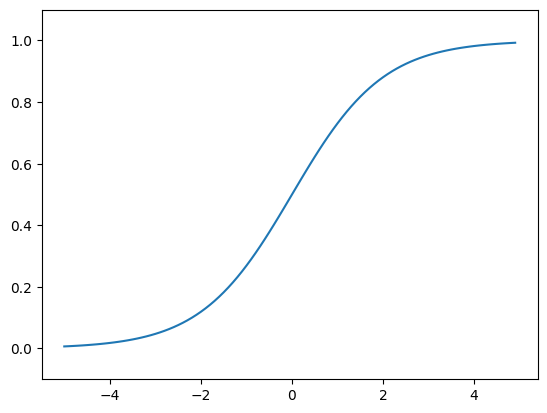

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.2 阶跃函数

In [9]:
#阶跃函数的实现
def step_function(x):
    y = x > 0
    # print(y)
    return y.astype(np.int32)    

# step_function(np.array([-1.0, 1.0, 2.0]))

In [10]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
y = y.astype(np.int32)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


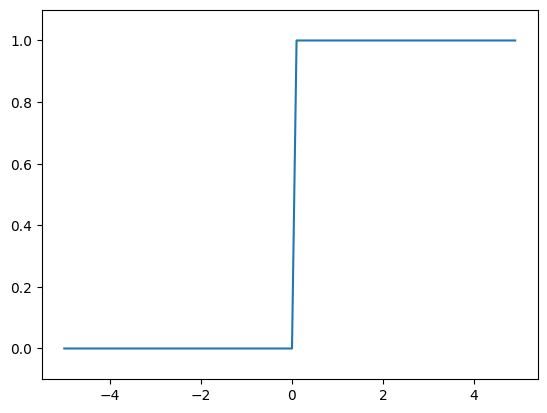

In [11]:
x1 = np.arange(-5.0, 5.0, 0.1)
# print(x1)
y1 = step_function(x1)
# print(y1)
plt.plot(x1, y1)
plt.ylim(-0.1, 1.1) #定义y轴的范围
plt.show()

### 激活函数ReLU

ReLU（Rectified Linear Unit）函数，输入大于0时，直接输出该值，输入小于0时，输出为0。$$ h(x)=\begin{cases} x \quad (x > 0)\\0 \quad (x \leq 0)\end{cases}$$

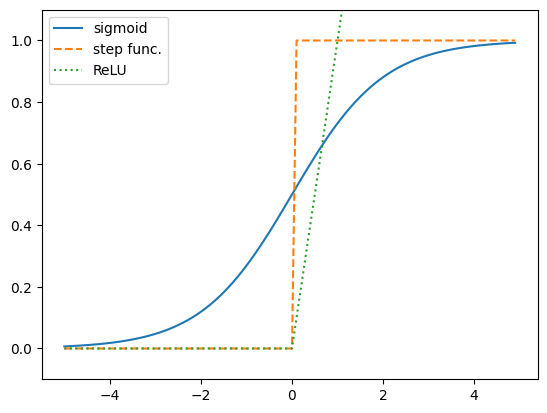

In [ ]:
#实现ReLU函数
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
y1 = step_function(x)
y2 = relu(x)
plt.plot(x, y, label='sigmoid')
plt.plot(x, y1, label='step func.', linestyle='--')
plt.plot(x, y2, label='ReLU', linestyle=':')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

## 3.3 多维数组的运算

### 3.3.1 多维数组

In [15]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print("ndim", np.ndim(A)) #秩，即向量的维度
print("shape", A.shape)

B = np.array([[1,2], [3,4], [5,6]])
print(B)
print("ndim", np.ndim(B))
print("shape", B.shape)

[1 2 3 4]
ndim 1
shape (4,)
[[1 2]
 [3 4]
 [5 6]]
ndim 2
shape (3, 2)


### 3.3.2 矩阵乘法

In [18]:
A = np.array([[1,2],[3,4],[10,11]])
print(A,A.shape)
B = np.array([[5,6,6],[7,8,8]])
print(B, B.shape)
print(np.dot(A, B))

[[ 1  2]
 [ 3  4]
 [10 11]] (3, 2)
[[5 6 6]
 [7 8 8]] (2, 3)
[[ 19  22  22]
 [ 43  50  50]
 [127 148 148]]


In [20]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A, A.shape)
B = np.array([[1,2],[3,4],[5,6]])
print(B, B.shape)
print(np.dot(A, B))

[[1 2 3]
 [4 5 6]
 [7 8 9]] (3, 3)
[[1 2]
 [3 4]
 [5 6]] (3, 2)
[[ 22  28]
 [ 49  64]
 [ 76 100]]


在矩阵的乘积运算中，对应维度的元素个数要保持一致。运算结果的矩阵C的形状是由矩阵A的行数和矩阵B的列数构成的。

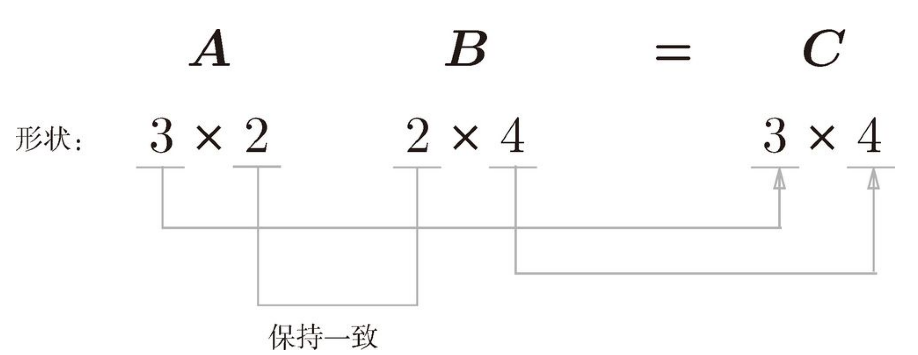

In [22]:
A = np.array([[1,2],[3,4],[5,6]])
print(A, A.shape)
B = np.array([7,8])
print(B, B.shape)
print(np.dot(A, B))

[[1 2]
 [3 4]
 [5 6]] (3, 2)
[7 8] (2,)
[23 53 83]


A是二维矩阵，B是一维矩阵（向量）时，B会被认为是2行1列（2，）的矩阵，也要保持对应维度的元素个数一致。

### 3.3.3 神经网络的内积

假设有这样一个神经网络，省略了偏置和激活函数，只有权重W[w1, w2]=[[1,3,4],[2,4,6]]。对于输入X[x1,x2]=[1,2]，计算Y。
$$ Y=WX+B $$

In [23]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
print(X.shape, W.shape)
Y = np.dot(X, W)
print(Y)

(2,) (2, 3)
[ 5 11 17]


## 3.4 3层神经网络的实现

通过矩阵乘积得到第一层的结果，在通过激活函数获得第一层的输出信号，继续与第二层进行乘积，依次类推，到最后一个隐藏层时，需要采用的激活函数与之前不同，应该根据求解问题的性质决定。一般，**回归问题可以采用恒等函数，二元分类可以采用sigmoid函数，多元分类可以使用softmax函数**。

针对神经网络的第1层节点的计算，可以将第1层的加权和表示为：$$ A^{(1)}=XW^{(1)}+B^{(1)}$$ $$ A^{(1)}=(a_1^{(1)} \quad a_2^{(1)} \quad a_3^{(1)})$$ $$X=(x_1, \quad x_2)$$ $$ B^{(1)}=(b_1^{(1)}\quad b_2^{(1)}\quad b_3^{(1)})$$ $$W^{(1)}=\begin{pmatrix}w_{11}^{(1)}\quad w_{21}^{(1)}\quad w_{31}^{(1)} \\ w_{12}^{(1)}\quad w_{22}^{(1)}\quad w_{32}^{(1)}\end{pmatrix}$$

In [24]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
def init_network():
    network={}
    network['W1']=np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1']=np.array([0.1, 0.2, 0.3])
    network['W2']=np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2']=np.array([0.1, 0.2])
    network['W3']=np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3']=np.array([0.1, 0.2])
    return network

# forward函数表示从输入到输出方向的传递处理。
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 输出层的设计

机器学习中的问题大致可以分为分类问题和回归问题。神经网络可以用在分类问题和回归问题上，需要根据情况改变输出层的激活函数，一般而言，回归问题用恒等函数，分类问题用softmax函数。
分类问题：数据属于哪一个类型的问题，如区分图像中的人是男性还是女性。
回归问题：根据某个输入预测一个（或连续的）数值，如根据一个人的图像预测这个人的体重。

### softmax函数的实现

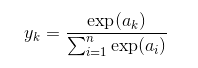

exp(x)是表示e的x次方的指数函数，e是纳皮尔常数2.7182...

In [ ]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 指数函数
print(exp_a)
sum_exp_a = np.sum(exp_a) # 指数函数的和
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


softmax函数的输出与所有的输入信号相连，输出层的各个神经元都受到所有输入信号的影响。

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a/sum_exp_a

print(softmax(a))
    

[0.01821127 0.24519181 0.73659691]


softmax函数的实现中要进行指数函数的运算，因此很容易出现指数函数的值非常大的情况，但计算处理“数”时，存在有效位数，即可能出现“溢出”的情况，需要注意！！

### 改进的softmax函数

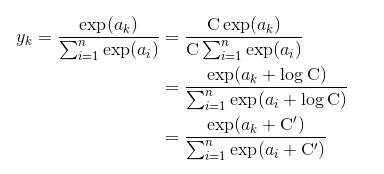

说明：在进行softmax的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的C'可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。

In [ ]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

[nan nan nan]


C:\Users\Lee\AppData\Local\Temp/ipykernel_1960/5665391.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
C:\Users\Lee\AppData\Local\Temp/ipykernel_1960/5665391.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [ ]:
c = np.max(a)
d = a - c
print(d)
y = np.exp(d) / np.sum(np.exp(d))
print(y)
print(np.sum(y))

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a    
    return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。 因此，神经网络在进行分类时， 输出层的softmax函数可以省略。在实际的问题中，由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数一般会被省略。